<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage: data(ais)
Format: A data frame with 202 observations on the following 13 variables.

- `rcc`: red blood cell count, in
- `wcc`: white blood cell count, in per liter
- `hc`: hematocrit, percent
- `hg`: hemaglobin concentration, in g per decaliter
- `ferr`: plasma ferritins, ng
- `bmi`: Body mass index, kg
- `ssf`: sum of skin folds
- `pcBfat`: percent Body fat
- `lbm`: lean body mass, kg
- `ht`: height, cm
- `wt`: weight, kg
- `sex`: a factor with levels `f` `m`
- `sport`: a factor with levels `B_Ball` `Field` `Gym` `Netball` `Row` `Swim` `T_400m` `T_Sprnt` `Tennis` `W_Polo`

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [1]:
# Set the number of threads to be 1 for K Means to proceed without warnings
import os
os.environ['OMP_NUM_THREADS'] = '1'


### 0 Imports

In [1]:
# IMPORT LIBRARIES
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For statistical data visualization
import sklearn  # For machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# import tensorflow as tf  # For deep learning
import requests  # For making HTTP requests
import json  # For working with JSON data
import os  # For interacting with the operating system
import sys  # For system-specific parameters and functions
import seaborn as sns

### 1. Import the data

In [2]:
csv_file = '../DATA/ais.csv'
ais = pd.read_csv(csv_file, index_col=0)

### 2. Do some EDA of relationships between features.

In [8]:
ais.head(8)

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball
6,4.10,4.4,37.4,12.5,42,21.04,75.2,15.58,53.77,174.0,63.7,f,B_Ball
7,4.31,5.3,39.6,12.8,73,21.69,87.2,19.99,60.17,186.2,75.2,f,B_Ball
8,4.42,5.7,39.9,13.2,44,20.62,97.9,22.43,48.33,173.8,62.3,f,B_Ball


In [10]:
ais.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 202
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 22.1+ KB


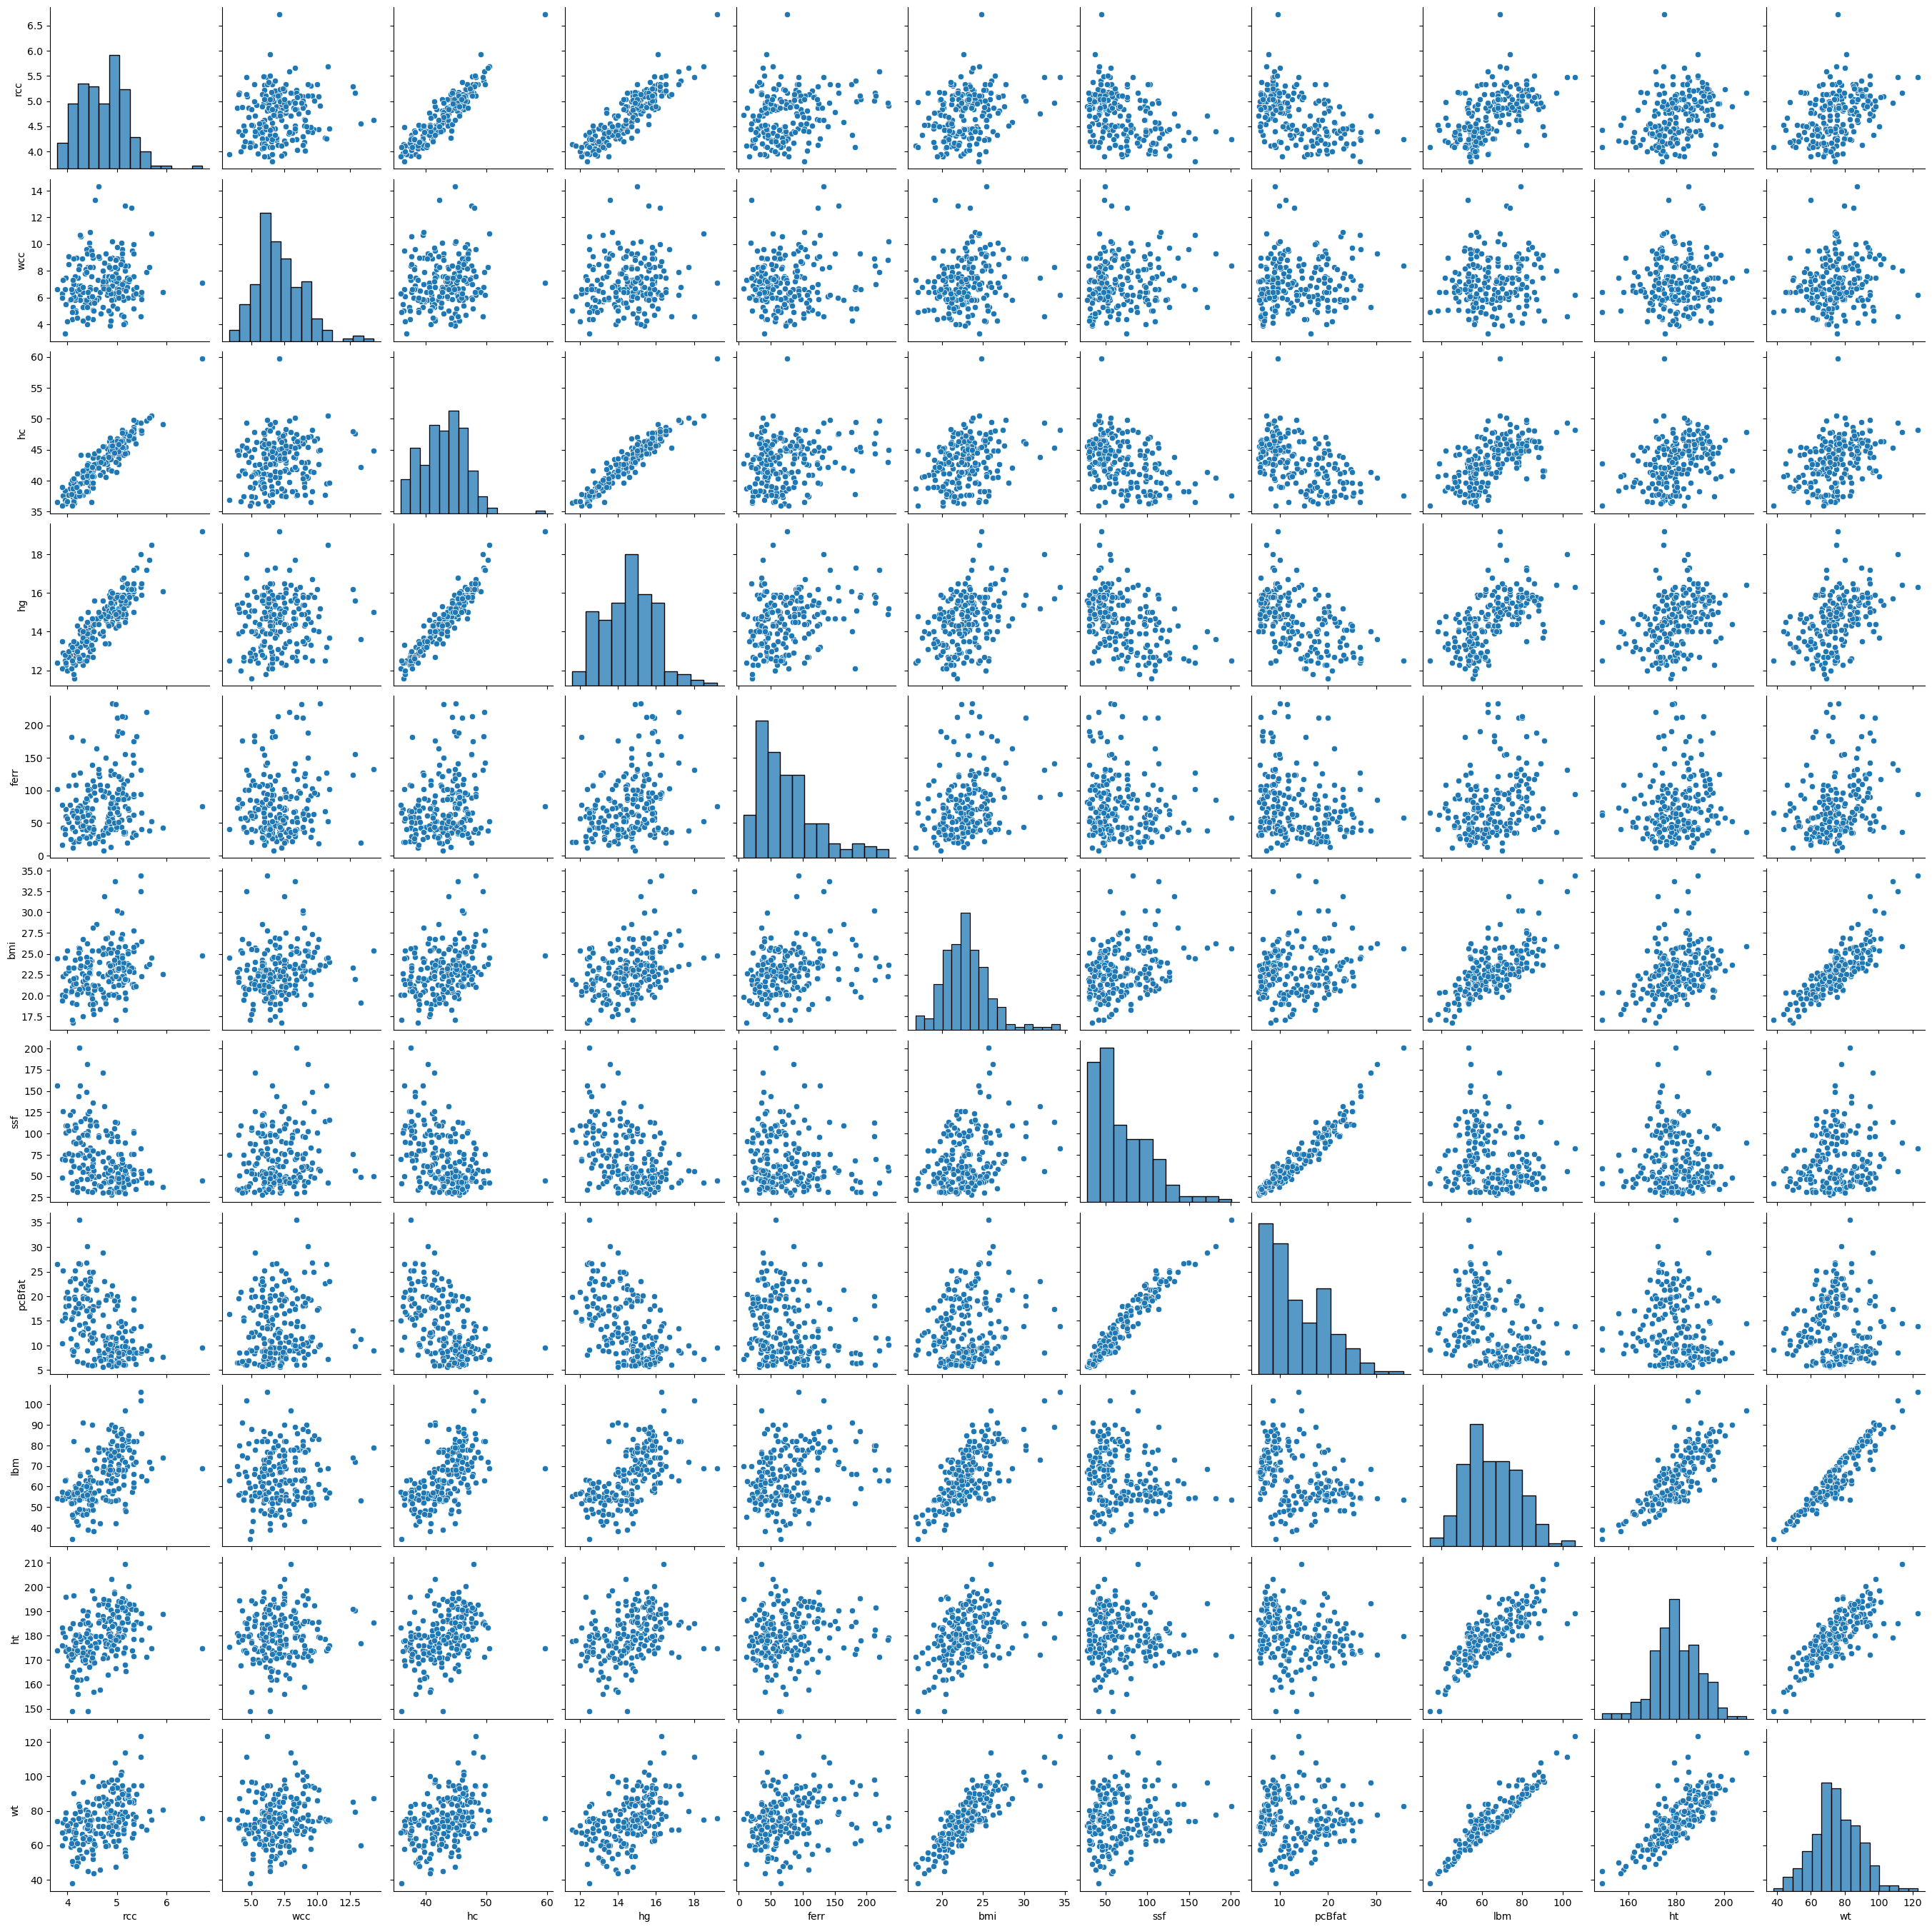

In [9]:
sns.pairplot(ais)

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [12]:
# ANSWER
import sklearn.preprocessing


In [14]:
ais_clustering = ais.drop(columns=['sex', 'sport'])
ais_standardized = StandardScaler().fit_transform(ais_clustering)


In [29]:
type(ais_standardized)

numpy.ndarray

### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [17]:
# ANSWER
km2 = KMeans(n_clusters=2)
km2.fit(ais_standardized)

km4 = KMeans(n_clusters=4)
km4.fit(ais_standardized)

KMeans(n_clusters=4)

### 5. Get the labels for the models using the labels_ attribute.

In [18]:
# ANSWER
km2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [19]:
km4.labels_

array([3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 2, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 2, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 2])

### 6. Elbow Method For Optimal k

For each k value, we will initialize k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

In [20]:
# ANSWER
km2.inertia_

1432.8802984104345

In [21]:
km4.inertia_

1048.6912405815087

In [26]:
inertias = []
max_k = 30
for k in range(1, max_k):
    km = KMeans(n_clusters=k).fit(ais_standardized)
    inertias.append(km.inertia_)

inertias


[2221.999999999999,
 1432.8802984104345,
 1275.036449776366,
 1048.5864889873294,
 987.3553764506862,
 922.5010647337853,
 864.9674307966119,
 811.7039096596923,
 791.2601951519528,
 731.0941016473595,
 753.9601306404412,
 651.5690533030076,
 653.188817877213,
 617.9747388508824,
 611.7522526635786,
 575.097594157284,
 571.1078398783267,
 552.1106537144587,
 538.1560741506246,
 519.5172172239401,
 507.93020111195364,
 494.0610885311628,
 467.8408897250265,
 472.37906610921084,
 448.92738547702527,
 447.88634276132564,
 421.6506193853513,
 435.9373045231037,
 417.7207800293116]

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

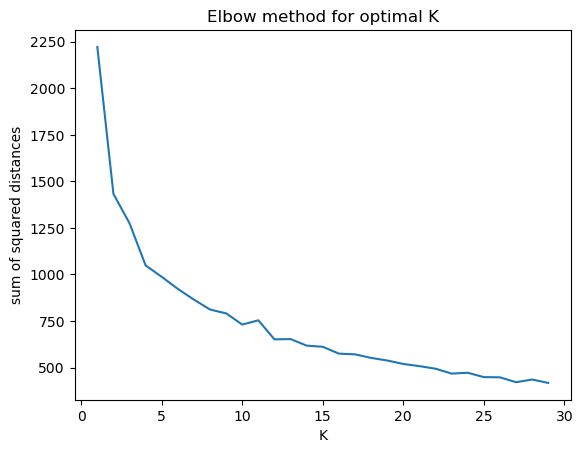

In [27]:
# ANSWER
plt.plot(range(1,max_k), inertias)
plt.xlabel('K')
plt.ylabel('sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

The labels calculated above can be a new column of the dataset.

<Axes: xlabel='wt', ylabel='pcBfat'>

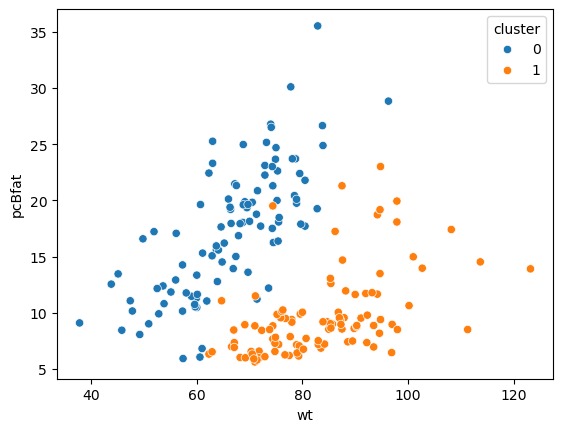

In [33]:
# ANSWER
ais['cluster'] = km2.labels_
# plt.scatter(x=ais.wt, y=ais.pcBfat, c=ais.cluster)

sns.scatterplot(ais, x='wt', y='pcBfat', hue='cluster')


<Axes: xlabel='wt', ylabel='pcBfat'>

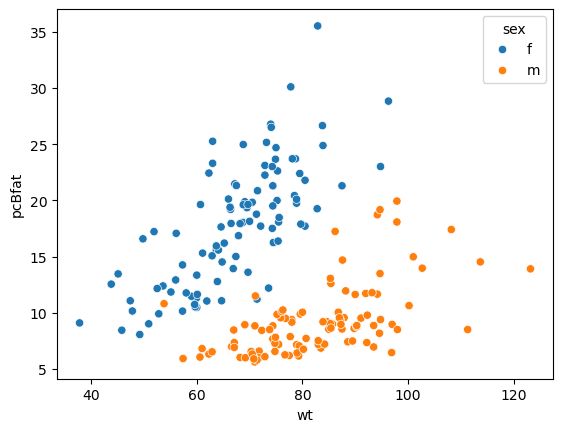

In [34]:
sns.scatterplot(ais, x='wt', y='pcBfat', hue='sex')



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



